In [9]:
import os, sys, re, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

try:
    scriptdir
except NameError:
    print('No script directory')
    scriptdir = !pwd
    
now = datetime.datetime.now()
today = str(now.year)+'-'+str(now.month)+'-'+str(now.day)

outputPath = scriptdir[0]+'/NHP_outputFiles'
masterPath =  scriptdir[0]+'/NHP_masterFiles'
infectionDataPath=masterPath+'/AnimalDataFromAnalysisII.csv'
#animalDataPath = scriptdir[0]+'/NHP_masterfiles_Nathanael/191007_animalData.txt'

#loading data with experiment and infection info


In [10]:
#neutDataPath = masterPath+'/171211_neut_d0.csv'
neutDataPath = scriptdir[0]+'/NHP_masterfiles_Nathanael/191127_all_neut_merged.csv'#masterPath+'/191023_Neut_summary.txt'
neutDataPath
neutDf = pd.read_csv(neutDataPath, sep=',')

##parsing numbers
header = ['id','titer','expTmp', 'assayDate', 'dpi']

## add experimental data
neutDf=pd.merge(neutDf, infectionDf, on='id', how='left')


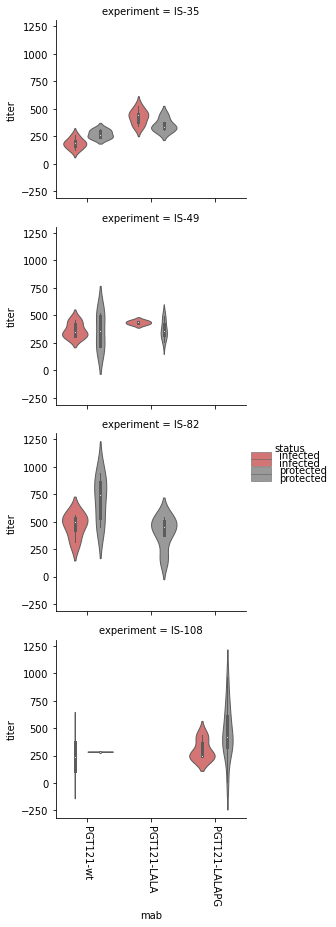

In [7]:
###using data with robust fit and 6val

#############
#############--------------------used for paper figure

neutDataPath = scriptdir[0]+'/NHP_neut/191228_neut_long_191127vs191212.csv'
neutDataPath
neutDf = pd.read_csv(neutDataPath, sep=',')

##parsing numbers
header = ['id','titer', 'fit', 'assayDate']#['dpi', 'titer']

neutDf=pd.merge(neutDf, infectionDf, on='id', how='left')

g=sns.catplot(x="mab", y="titer", data=neutDf[neutDf['mab'] != "DEN3-wt"], row='experiment', hue='status',
              palette={'infected':'#E36565', 'protected':'#999999'},
              height= 3,aspect=1, 
              s=12, alpha = 0.6,
              linewidth=1, kind='violin')

g.set_xticklabels(rotation=-90)
g.add_legend()

#neutDf[neutDf['mab'] != "DEN3-wt"].to_clipboard()

svgPath=outputPath+'/'+today+'_d0_Neut_merged.svg'
pdfPath=outputPath+'/'+today+'_d0_Neut_merged.pdf'

#print(svgPath)
g.savefig(svgPath)
g.savefig(pdfPath)



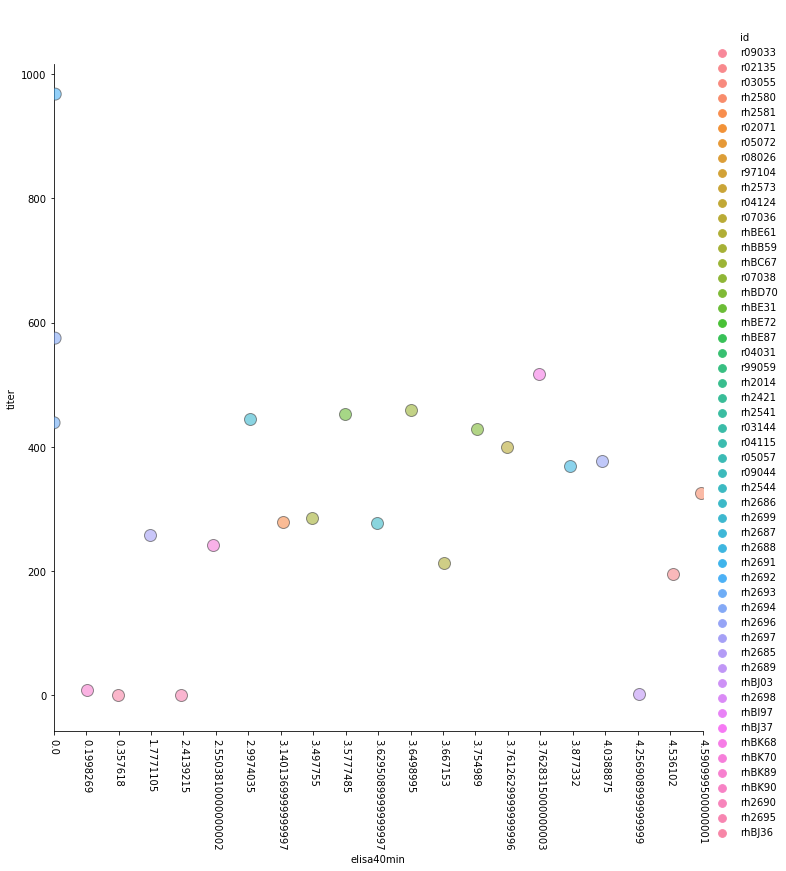

In [8]:
###reading ELISA data
elisaDataPath = scriptdir[0]+'/NHP_masterfiles_Nathanael/20019-12-10_ELISA20vs40.csv'
elisaDf=pd.read_csv(elisaDataPath, sep=',', index_col=False)
elisaDf.columns=['id','elisa20min', 'elisa40min']


# g=sns.catplot(x="elisa20min", y='elisa40min', data=elisaDf, hue='id',
#               height= 10,aspect=1, 
#               linewidth=1, alpha = 0.6, s=12)
# g.set_xticklabels(rotation=-90)

selDate = neutDf['assayDate'].isin([191127]) #171211, ,190424
selectNeut=neutDf[selDate]
selectNeut
elisaNeutDf=pd.merge(selectNeut[['id', 'mab','titer', 'assayDate']], elisaDf, on='id', how='left')
elisaNeutDf
g=sns.catplot(x="elisa40min", y='titer', data=elisaNeutDf, hue='id', #col='assayDate',
              height= 10,aspect=1, 
              linewidth=1, alpha = 0.6, s=12)
g.set_xticklabels(rotation=-90)
plt.gca().set_xlim(0, 20)

# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x']+.02, point['y'], str(point['val']))

# label_point(elisaNeutDf.elisa20min, elisaNeutDf.titer, elisaNeutDf.id, plt.gca())

ax=plt.gca()
ax.set_xlim([0, 20])
# for line in range(0,elisaNeutDf.shape[0]):
#     #print(elisaNeutDf.elisa20min[line]+'withNeut: '+elisaNeutDf.titer[line])
#     ax.text(float(elisaNeutDf.elisa20min[line])+0.02, float(elisaNeutDf.titer[line]), 
#     elisaNeutDf.id[line], horizontalalignment='left', 
#     size='medium', color='black', weight='normal')

exportDf=pd.merge(elisaDf, infectionDf, on='id', how='left')
exportDf.to_clipboard()

In [8]:
### shared parameters for plotting

psize=3.5

#defining fonts
titlefont = {'fontname':'Arial', 'fontsize': 14, 'fontweight' : 'bold', 'verticalalignment': 'baseline','horizontalalignment': 'center'}
tickfont = {'fontname':'Arial', 'fontsize': 14, 'fontweight' : 'normal'}
labelfont = {'fontname':'Arial', 'fontsize': 14, 'fontweight' : 'bold'}


    
colors = ["windows blue", "amber", "faded green", "pastel orange", "dull pink", "dusty purple", "greyish"]
pal= sns.xkcd_palette(colors) # sns.color_palette("husl", 4),
redBlueSix=sns.color_palette(["#1C3752", "#BB270B", "#4572B9", "#6A73AF", "#EAE6DB", "#FD6A77"])
variousColors=sns.color_palette(["#1C3752", "#BB270B", "#f4a261", "#2a9d8f", "#4572B9", "#6A73AF", "#F5D974", "#EAE6DB", "#FD6A77"])
mAbColorDict = {'apex':"cornflowerblue",'hmp':"mediumorchid", 'cd4bs':"cornflowerblue", 'intf':"lightcoral", 'silent':"orange",'cont':"dimgray"}


sns.set_context("paper", font_scale=1.6)
def formatPlot(tmpax, subdf):
    ##setting simpler titles
    [plt.setp(ax.texts, text="") for ax in tmpax.axes.flat] # remove the original texts                                         
    tmpax.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    tmpax.fig.subplots_adjust(wspace=.2, hspace=.2)
      
    tmpax.set_axis_labels('mAb', 'titer')
    #tmpax.fig.suptitle('TestPlot') 
    
    #xmax=90#subdf.dpi.max()
    #xmin=subdf.dpi.min()
    ymax=110#subdf.value.max()+50
    ymin=-10
    xoffset=1.3
     
    #for ax, title in zip(plot.axes.flat, col_order):
    #    ax.set_title(title)
    #    ax.text(0.85, 0.85,'Text Here', fontsize=9) 
    i=0
    for row in tmpax.axes:
        for plot in row:
            plot.tick_params(axis='both', labelsize=tickfont['fontsize'], length=5, width=1)
            for tick in plot.get_xticklabels():
                tick.set_fontname(tickfont['fontname'])
                tick.set_fontweight(tickfont['fontweight'])
            for tick in plot.get_yticklabels():
                tick.set_fontname(tickfont['fontname'])
                tick.set_fontweight(tickfont['fontweight'])
            
            plot.set_title(plot.get_title('center'), **titlefont)
            plot.set_ylabel(plot.get_ylabel(), **labelfont)
            plot.set_xlabel(plot.get_xlabel(), **labelfont)
        
            plot.facecolor=(0,1,0,0.1)
           # plot.axhline(0, alpha=0.5, color='grey', ls=':')
           # plot.axhline(100, alpha=0.5, color='grey', ls=':')
            #plot.set_xscale('log')
            #plot.set_yscale('log')
            #plot.set_xlim([xmin/xoffset, xmax*xoffset])
            plot.set_ylim([-0, 1000])
            #plot.set_ylim([ymin, ymax])
            plot.spines['right'].set_visible(True)
            plot.spines['right'].set_linewidth(1)
            plot.spines['left'].set_visible(True)
            plot.spines['left'].set_linewidth(1)
            plot.spines['top'].set_visible(True)
            plot.spines['top'].set_linewidth(1)
            plot.spines['bottom'].set_visible(True)
            plot.spines['bottom'].set_linewidth(1)

In [5]:
#setting up color dict

testDf=neutDf[['id','status']]
#testDf=testDf.replace(to_replace = , value = 'protected')
testDf=testDf.replace(to_replace ='protected', value = 'o', regex = True)
testDf=testDf.replace(to_replace ='infected', value = 's', regex = True) 
symboldict=dict(zip(testDf.id, testDf.status))
#testDict = dict(zip(expidDf.id, expidDf.status))
symboldict

#"#1C3752", "#BB270B"

testDf=neutDf[['id','status']]
testDf=testDf.replace(to_replace ='protected', value = "#565656", regex = True)
testDf=testDf.replace(to_replace ='infected', value = '#BB270B', regex = True) 
infDict= symboldict=dict(zip(testDf.id, testDf.status))

#infDict

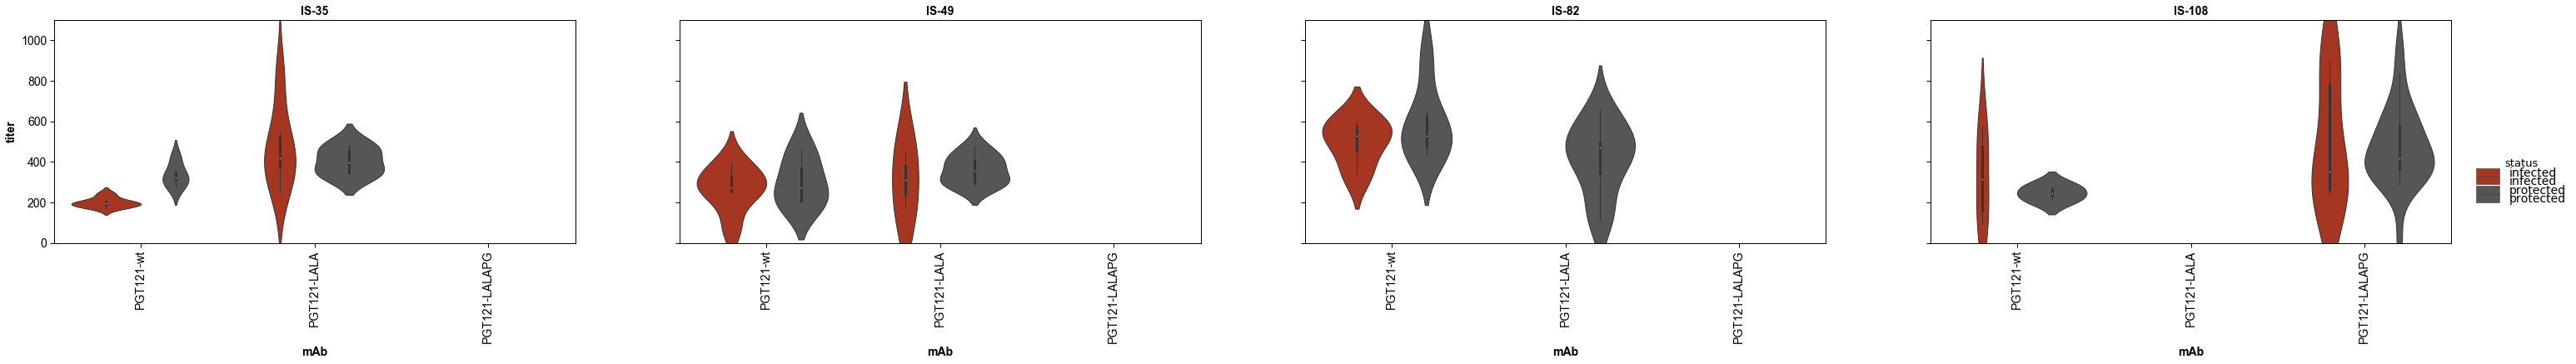

In [7]:
noDen = neutDf['mab'] != "DEN3-wt"
notDate = neutDf['assayDate'].isin([171211, 191127,190424]) #171117 #12#190424
toPlot= neutDf[noDen & notDate]
#toPlot= neutDf[noDen]
#toPlot=toPlot.groupby('id').mean().reset_index()
# g = sns.FacetGrid(toPlot, margin_titles=True,
#                   row= 'experiment',
#                   #col="mAb",
#                   height= 4,aspect=.80, 
#                   hue="id",
#                   palette = infDict, #cellColorDict, #epitopeColorDict, #mabColorDict
# #                   hue_kws={#"marker": symboldict
# #                            #["D","v","^", "s", "o", "*", "h", ">","<", "p", "X","*", 'H', '8', +','d','|'],
                           
# #                            #"markeredgecolor" :"orange",
# #                           }
#                  )

# g=sns.catplot(x="mAb", y="value", data=toPlot, col='experiment', hue='id',
#               palette=infDict,#{'infected':'#BB270B', 'protected':'#565656'},
#               height= 4,aspect=.60, 
#               s=12
#              )
# g=sns.catplot(x="mab", y="titer", data=toPlot, col='experiment', hue='status',
#               palette={'infected':'#BB270B', 'protected':'#565656'},
#               height= 5,aspect=1, 
#               s=12, linewidth=1, alpha = 0.8)
# g=sns.catplot(x="mab", y='titer', data=toPlot, row='experiment', hue='status', kind="violin",
#               palette={'infected':'#BB270B', 'protected':'#909090'},
#               height= 3,aspect=1.5, 
#               linewidth=1, alpha = 0.2, s=12)
# g=sns.catplot(x="mab", y="titer", data=toPlot, col='experiment', hue='status',
#               palette={'infected':'#BB270B', 'protected':'#565656'},
#               height= 5,aspect=2, 
#               s=12, linewidth=1, alpha = 0.4, kind='violin')

g.add_legend()


formatPlot(g, toPlot)
g.set(ylim=(0, 1100))
#g.set_xticklabels(rotation=-90)

for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90, horizontalalignment='center')


svgPath=outputPath+'/'+today+'_d0_Neut_merged.svg'
pdfPath=outputPath+'/'+today+'_d0_Neut_merged.pdf'

#print(svgPath)
g.savefig(svgPath)
g.savefig(pdfPath)



In [ ]:
### comparing to elisa
noDen = neutDf['mab'] != "DEN3-wt"
notDate = neutDf['assayDate'].isin([171211, 191127,190424]) #171117 #12#190424
toPlot= neutDf[noDen & notDate]

id          r02071                     r02135                     r03055  \
assayDate 171117.0 171211.0 191127.0 171117.0 171211.0 191127.0 171117.0   
titer        215.2    349.9    343.2    456.0    172.7    195.4    301.7   

id                            r03144  ...   rhBJ37   rhBK68                    \
assayDate 171211.0 191127.0 171117.0  ... 191127.0 190424.0 190625.0 191127.0   
titer        193.1    242.1    388.8  ...    357.7    534.8    159.7    517.5   

id          rhBK70                     rhBK89                    
assayDate 190424.0 190625.0 191127.0 190424.0 190625.0 191127.0  
titer        269.0    96.33    241.8    420.4    123.4    8.787  

[1 rows x 154 columns]

KeyError: 'mab'